# 🖼️ Captures d'écran des pages inspectées
## Page des MVP
Voici une capture d'écran de la page des MVP sur Basketball Reference. Cette table contient les informations sur les MVP, comme illustré ci-dessous :
![Capture d’écran du 2025-01-27 17-58-25.png](<attachment:Capture d’écran du 2025-01-27 17-58-25.png>)

## Page des statistiques des joueurs
Voici une capture d'écran d'une page de joueur (Nikola Jokic) contenant les statistiques de la saison régulière et des playoffs :

Table des statistiques de la saison régulière
![Capture d’écran du 2025-01-27 17-59-21.png](<attachment:Capture d’écran du 2025-01-27 17-59-21.png>)

Table des statistiques des playoffs
![Capture d’écran du 2025-01-27 18-02-11.png](<attachment:Capture d’écran du 2025-01-27 18-02-11.png>)
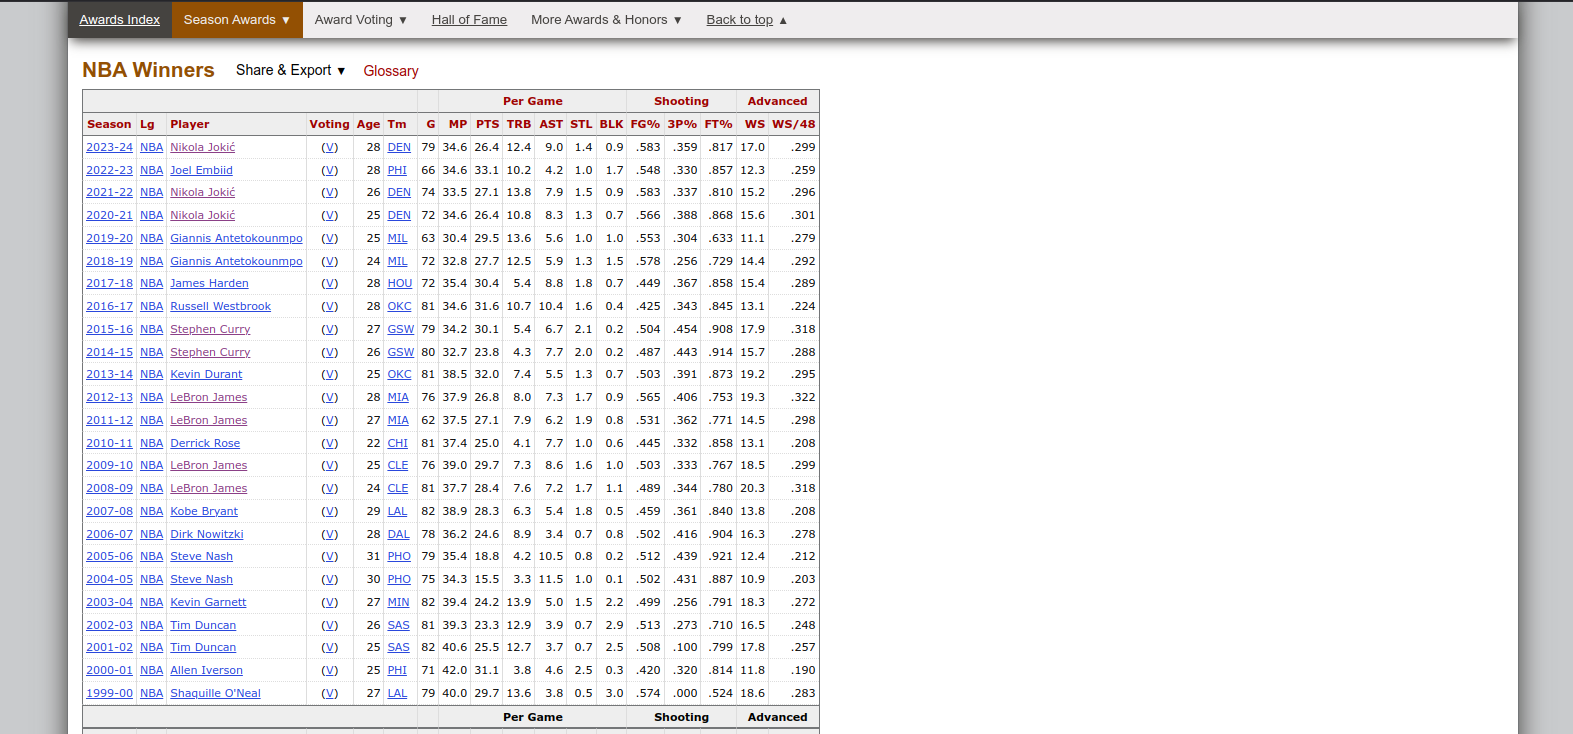
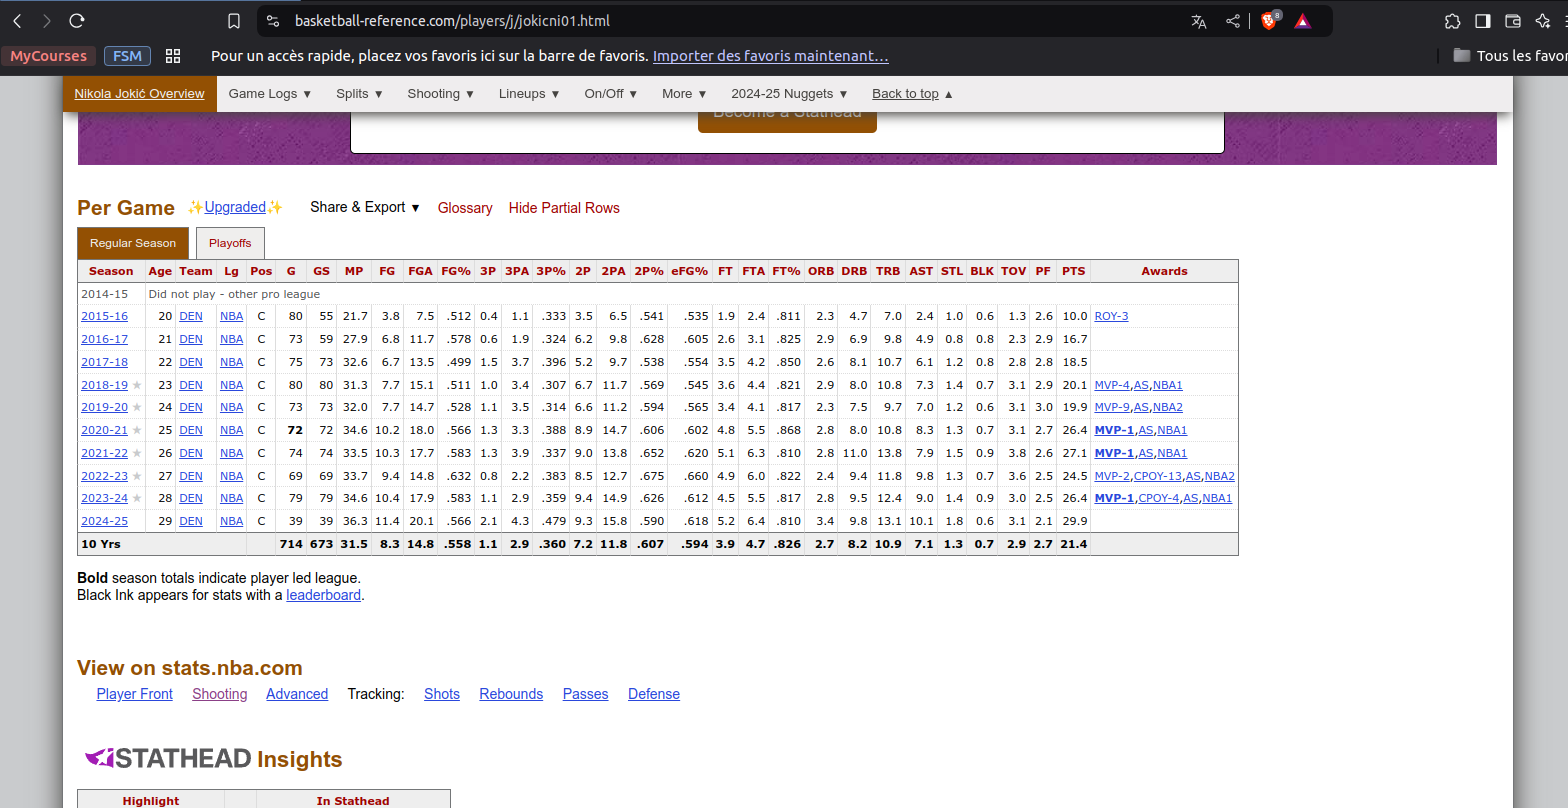
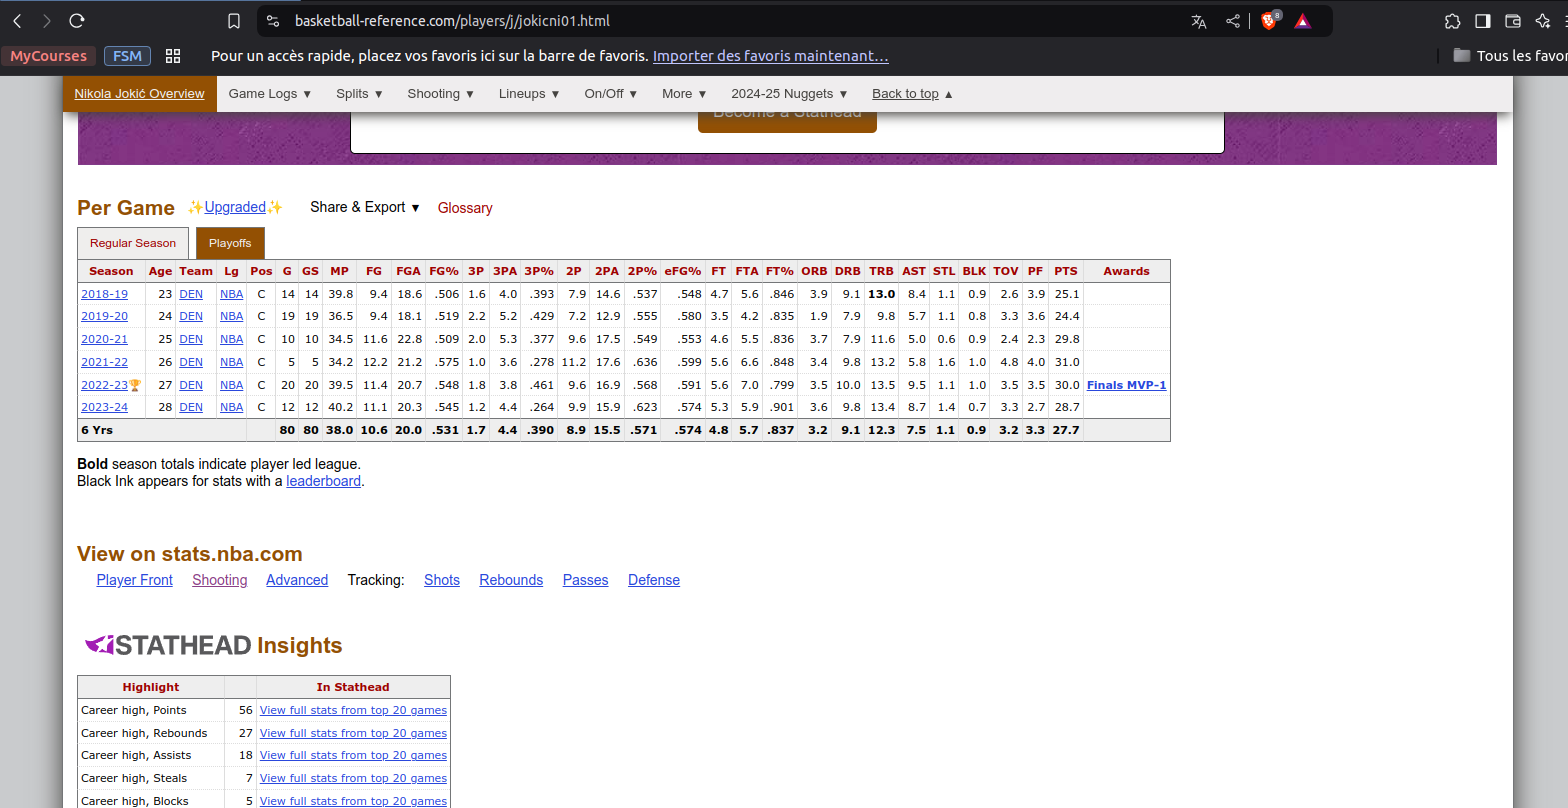

# 📝 Structure du code
1. Extraction des MVP
La fonction get_mvp_list() récupère les informations suivantes :
Nom du joueur
Année de récompense
Lien vers la page du joueur

2. Extraction des statistiques des joueurs
La fonction get_player_stats() scrape les statistiques pour une saison donnée :
Saison régulière : Table per_game_stats
Playoffs : Table per_game_stats_post

3. Sauvegarde des données
Les données sont converties en DataFrame avec pandas et exportées dans des fichiers CSV.



# 📂 Structure des fichiers générés
- mvp_regular_season_stats.csv : Contient les statistiques de la saison régulière avec les colonnes :
    - player, season, games_played, points_per_game, etc.
- mvp_playoff_stats.csv : Contient les statistiques des playoffs avec les mêmes colonnes.



In [1]:
pip install bs4

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL des MVP
url_mvp = "https://www.basketball-reference.com/awards/mvp.html"

# Fonction pour extraire les MVP et leurs saisons
def get_mvp_list():
    response = requests.get(url_mvp.format(""))
    soup = BeautifulSoup(response.content, "html.parser")
    # The table ID might have changed, try to find it by class instead
    mvp_table = soup.find("table", {"id": "mvp_NBA"})

    # Check if the table was found
    if mvp_table:
        # Directly find all 'tr' elements within the table, skipping the 'tbody' search
        rows = mvp_table.find_all("tr")

        mvps = []
        for row in rows[1:]:  # Skip the header row
            player_td = row.find("td", {"data-stat": "player"})
            if player_td:  # Ensure the 'td' element was found
                player = player_td.text
                year = row.find("th", {"data-stat": "season"}).text[:4]
                link = player_td.find("a")["href"] # Find the link within the player's td
                mvps.append({"player": player, "year": year, "link": link})
        return mvps
    else:
        print("Error: MVP table not found.")
        return []  # Return an empty list if the table is not found


# Fonction pour extraire les stats d'un joueur
def get_player_stats(player_link, year):
    base_url = "https://www.basketball-reference.com"
    response = requests.get(base_url + player_link)
    soup = BeautifulSoup(response.content, "html.parser")

    # Récupérer les stats de la saison régulière
    regular_season_table = soup.find("table", {"id": "per_game_stats"})
    playoff_table = soup.find("table", {"id": "per_game_stats_post"})

    regular_season_stats = []
    playoff_stats = []

    if regular_season_table:
        rows = regular_season_table.find("tbody").find_all("tr")
        for row in rows:
            season = row.find("th", {"data-stat": "year_id"}).text
            if season.startswith(year):
                stats = {col["data-stat"]: col.text for col in row.find_all("td")}
                stats["season"] = season
                regular_season_stats.append(stats)

    if playoff_table:
        rows = playoff_table.find("tbody").find_all("tr")
        for row in rows:
            season = row.find("th", {"data-stat": "year_id"}).text
            if season.startswith(year):
                stats = {col["data-stat"]: col.text for col in row.find_all("td")}
                stats["season"] = season
                playoff_stats.append(stats)

    return regular_season_stats, playoff_stats

# Récupérer les MVP et leurs statistiques
mvp_list = get_mvp_list()
regular_season_data = []
playoff_data = []

for mvp in mvp_list:
    print(f"Fetching stats for {mvp['player']} ({mvp['year']})...")
    regular, playoff = get_player_stats(mvp["link"], mvp["year"])
    if regular:
        for stat in regular:
            stat["player"] = mvp["player"]
            regular_season_data.append(stat)
    if playoff:
        for stat in playoff:
            stat["player"] = mvp["player"]
            playoff_data.append(stat)

# Convertir en DataFrame et sauvegarder
df_regular = pd.DataFrame(regular_season_data)
df_playoff = pd.DataFrame(playoff_data)

df_regular.to_csv("mvp_regular_season_stats.csv", index=False)
df_playoff.to_csv("mvp_playoff_stats.csv", index=False)

print("Scraping terminé. Données sauvegardées dans des fichiers CSV.")


Fetching stats for Nikola Jokić (2023)...
Fetching stats for Joel Embiid (2022)...
Fetching stats for Nikola Jokić (2021)...
Fetching stats for Nikola Jokić (2020)...
Fetching stats for Giannis Antetokounmpo (2019)...
Fetching stats for Giannis Antetokounmpo (2018)...
Fetching stats for James Harden (2017)...
Fetching stats for Russell Westbrook (2016)...
Fetching stats for Stephen Curry (2015)...
Fetching stats for Stephen Curry (2014)...
Fetching stats for Kevin Durant (2013)...
Fetching stats for LeBron James (2012)...
Fetching stats for LeBron James (2011)...
Fetching stats for Derrick Rose (2010)...
Fetching stats for LeBron James (2009)...
Fetching stats for LeBron James (2008)...
Fetching stats for Kobe Bryant (2007)...
Fetching stats for Dirk Nowitzki (2006)...
Fetching stats for Steve Nash (2005)...
Fetching stats for Steve Nash (2004)...
Fetching stats for Kevin Garnett (2003)...
Fetching stats for Tim Duncan (2002)...
Fetching stats for Tim Duncan (2001)...
Fetching stats fo